<a href="https://colab.research.google.com/github/thihanaung-thnn/MLnotebooks/blob/main/04_iris_best_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
def report_model(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], 
                                                    random_state=123, test_size=0.33)

# Decision Tree Classicifier

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

In [5]:
def report_tree(model):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    plot_confusion_matrix(model, X_test, y_test)
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, feature_names=iris['feature_names'], filled=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50





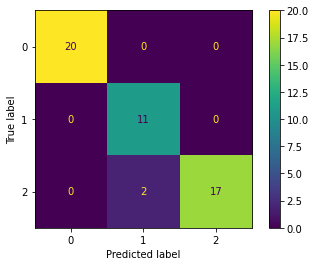

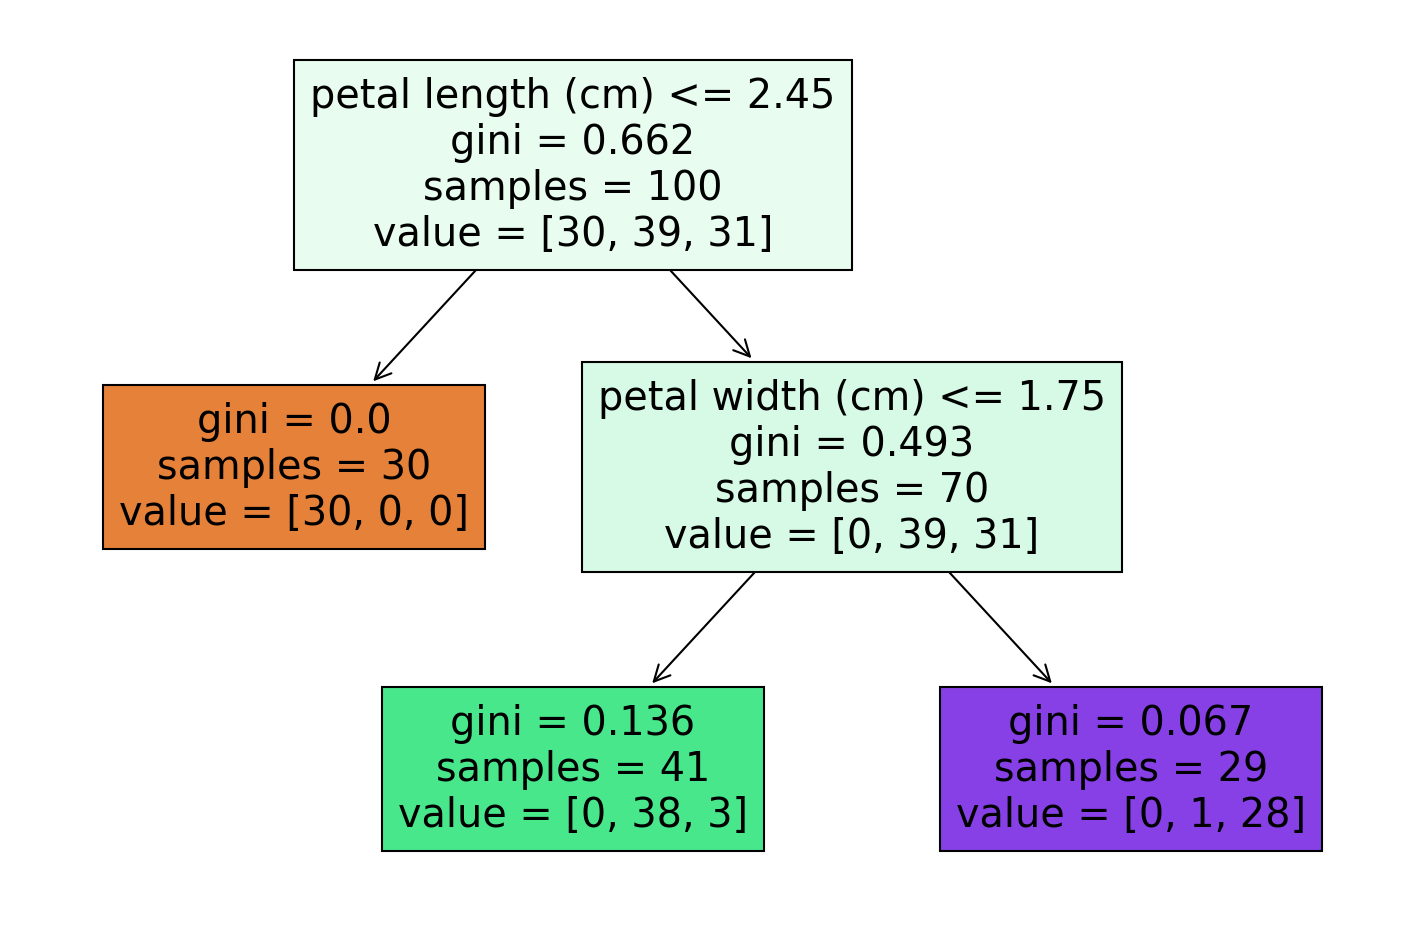

In [6]:
dtc = DecisionTreeClassifier(max_leaf_nodes=3)
dtc.fit(X_train, y_train)
report_tree(dtc)

Even with 3 max leaf nodes, the model can predict 96% accuracy and same as logistic regression. The petal length <= 2.45 cm is the main feature for setosa species with gini impurity score of 0. For the rest of the species, the gini score is also low. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50





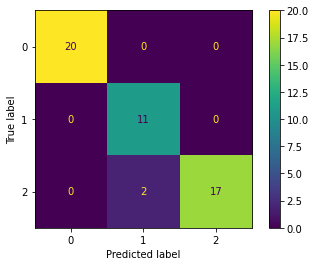

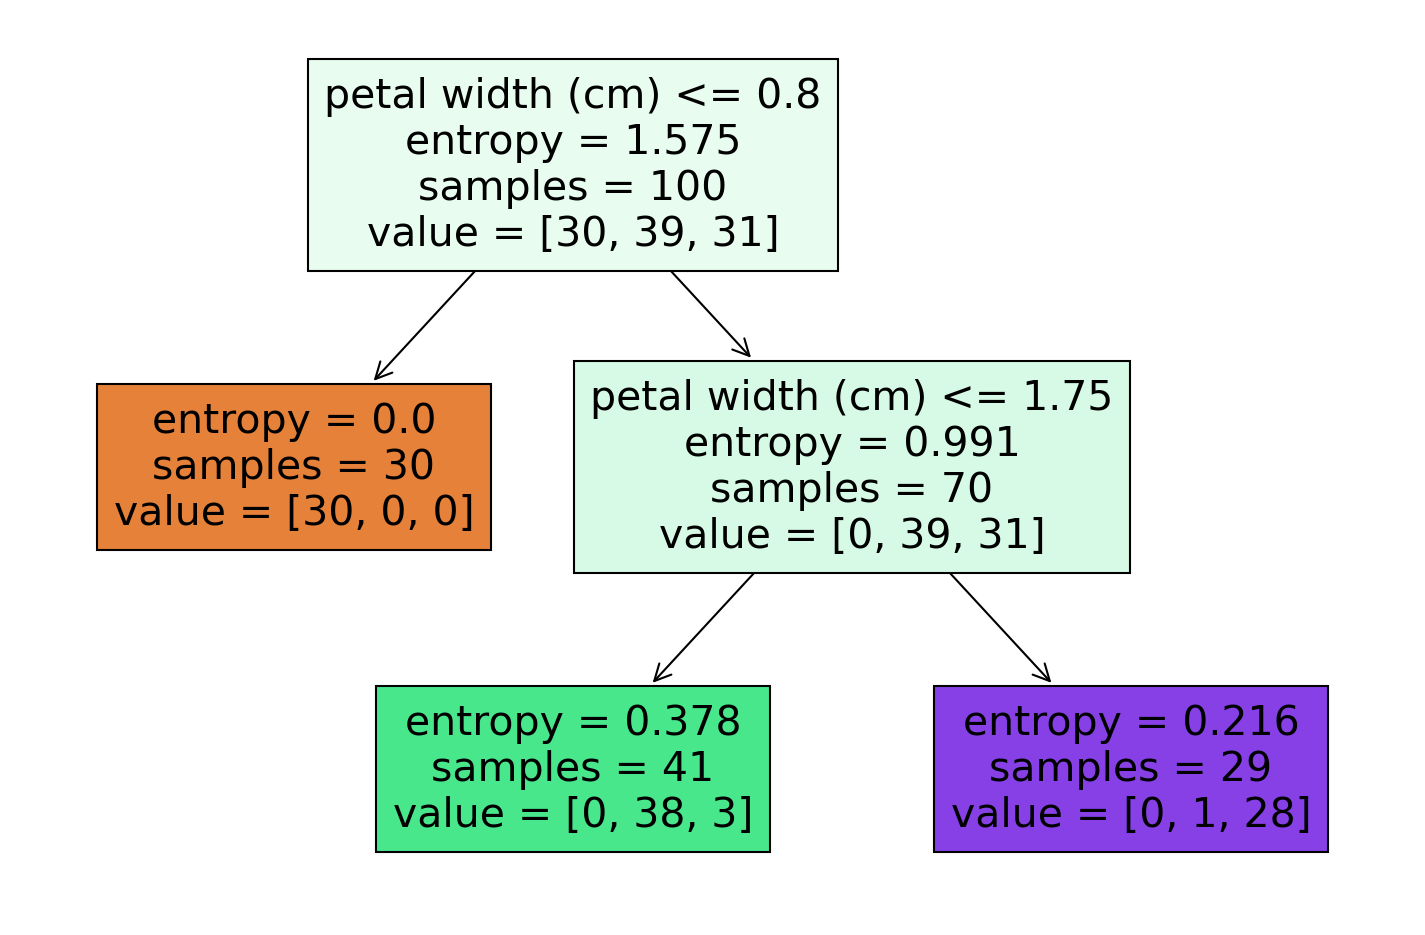

In [7]:
dtc = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)
dtc.fit(X_train, y_train)
report_tree(dtc)

Using 'entropy' for the information gain, it has the same accuracy above. Entropy classifies according to the petal width. We can say setosa can be classified by the petal length which is less than or equal to 2.45 cm or the pretal width which is less than or equal to 0.8 cm. For gini, if petal length more than 2.45 cm, look at the petal width. If the petal width is less than 1.75 cm, most of the flowers are versicolor. If petal width is greater than 1.75 cm, most of the species may be virginica. Decision trees are good for reports and finding the best features. Let's focus on finding the best accuracy. The leaf will be different between different runtimes, as I did not specify the random state as I want to know the different features.   

# Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
grid_params = dict(
    n_estimators = [64, 100, 124, 200],
    criterion = ['gini', 'entropy'], 
    max_depth = [3,5,7,10],
    max_features = [2,3,4], # as there are only 4 features, 'sqrt' and 'log2' has same value 
    bootstrap = [True, False]
)
rf_best = GridSearchCV(model, grid_params, n_jobs=-1)
rf_best.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 124, 200]})

In [9]:
rf_best.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



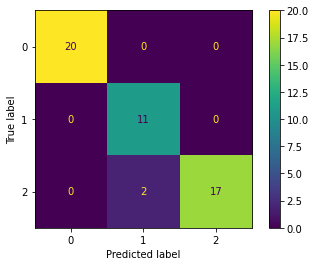

In [10]:
report_model(rf_best)

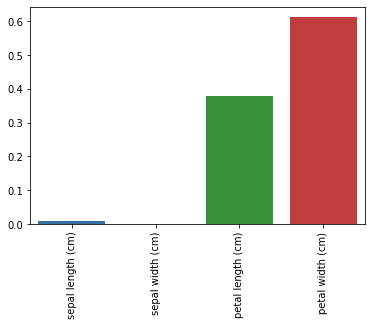

In [11]:
sns.barplot(x = iris['feature_names'], y=rf_best.best_estimator_.feature_importances_)
plt.xticks(rotation=90);

Important features are also petal width and petal length. 

# AdaBoost Classifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier()
grid_params = dict(
    n_estimators = [50, 100, 200, 300], # more estimators for low learning rate
    learning_rate = np.linspace(0,1,11),
    random_state = [123],
)
ada_best = GridSearchCV(model, grid_params, n_jobs=-1)
ada_best.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [123]})

{'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 123}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



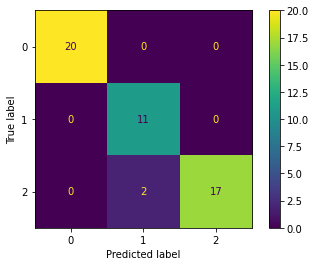

In [14]:
print(ada_best.best_params_) # best result is the default hyperparameters
report_model(ada_best)

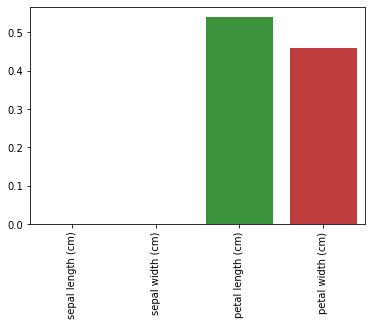

In [15]:
sns.barplot(x = iris['feature_names'], y=ada_best.best_estimator_.feature_importances_)
plt.xticks(rotation=90);

# Gradient Boosting Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
model = GradientBoostingClassifier()
grid_params = dict(
    learning_rate = np.linspace(0,1,11),
    n_estimators = [64, 100, 124, 200, 300], 
    max_depth = [3, 4, 5]
)
gbc_best = GridSearchCV(model, grid_params, n_jobs=-1)
gbc_best.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [64, 100, 124, 200, 300]})

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 124}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.73      1.00      0.85        11
           2       1.00      0.79      0.88        19

    accuracy                           0.92        50
   macro avg       0.91      0.93      0.91        50
weighted avg       0.94      0.92      0.92        50



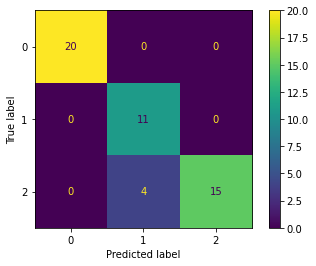

In [18]:
print(gbc_best.best_params_)
report_model(gbc_best)

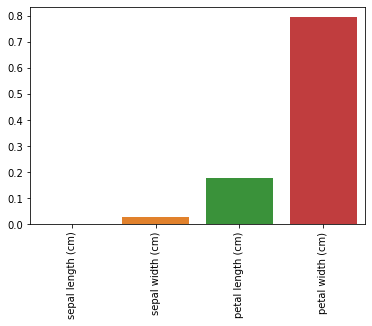

In [19]:
sns.barplot(x = iris['feature_names'], y=gbc_best.best_estimator_.feature_importances_)
plt.xticks(rotation=90);

# Support Vector Classicifier

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()
grid_params = dict(
    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    kernel = ['linear', 'rbf', 'poly', 'sigmoid'],
    gamma = ['scale', 'auto', 0.2], # as there are only 4 features
    degree = [2,3,4,5,6,7], # for poly / according to data distribution, poly may be a good fit
)
svc_best = GridSearchCV(model, grid_params, n_jobs=-1)
svc_best.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4, 5, 6, 7],
                         'gamma': ['scale', 'auto', 0.2],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

{'C': 0.001, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.97        19

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



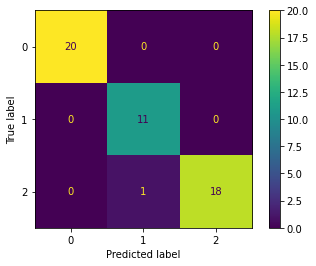

In [22]:
print(svc_best.best_params_)
report_model(svc_best)

In conclusion, almost all the models have the same scores. Which model will you choose? It depends on the size of data. For the iris data, it is a small dataset and it does not matter. For me, I will choose decision tree classificier, as it can explain well for criteria for classification. 
All three species can be classified well according to the petal length or width.